## Lab 6 - Logistic Regression (Iris Dataset)

## Importing

In [5]:
from sklearn.datasets import load_iris

## Load Dataset

In [6]:
iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [7]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [8]:
y.size

150

## Exploratory Data Analysis - EDA

In [17]:

import pandas as pd
import numpy as np

# Load the Iris dataset with as_frame=True
iris = load_iris(as_frame=True)

# Extract the petal width feature and create the binary target variable
X = iris.data[["petal width (cm)"]].values
y = (iris.target_names[iris.target] == 'virginica').astype(int)

# Create a DataFrame with petal width and target variable
data = pd.DataFrame(data=np.column_stack((X, y)), columns=["Petal Width (cm)", "Class"])

# Separate the DataFrame into two classes: virginica and non-virginica
virginica_data = data[data["Class"] == 1]
non_virginica_data = data[data["Class"] == 0]

# Descriptive statistics for each class
virginica_stats = virginica_data["Petal Width (cm)"].describe()
non_virginica_stats = non_virginica_data["Petal Width (cm)"].describe()

# Create a DataFrame for the descriptive statistics
stats_df = pd.DataFrame({
    "Virginica": virginica_stats,
    "Non-Virginica": non_virginica_stats
})

# Display the descriptive statistics table
print(stats_df)


       Virginica  Non-Virginica
count   50.00000     100.000000
mean     2.02600       0.786000
std      0.27465       0.565153
min      1.40000       0.100000
25%      1.80000       0.200000
50%      2.00000       0.800000
75%      2.30000       1.300000
max      2.50000       1.800000


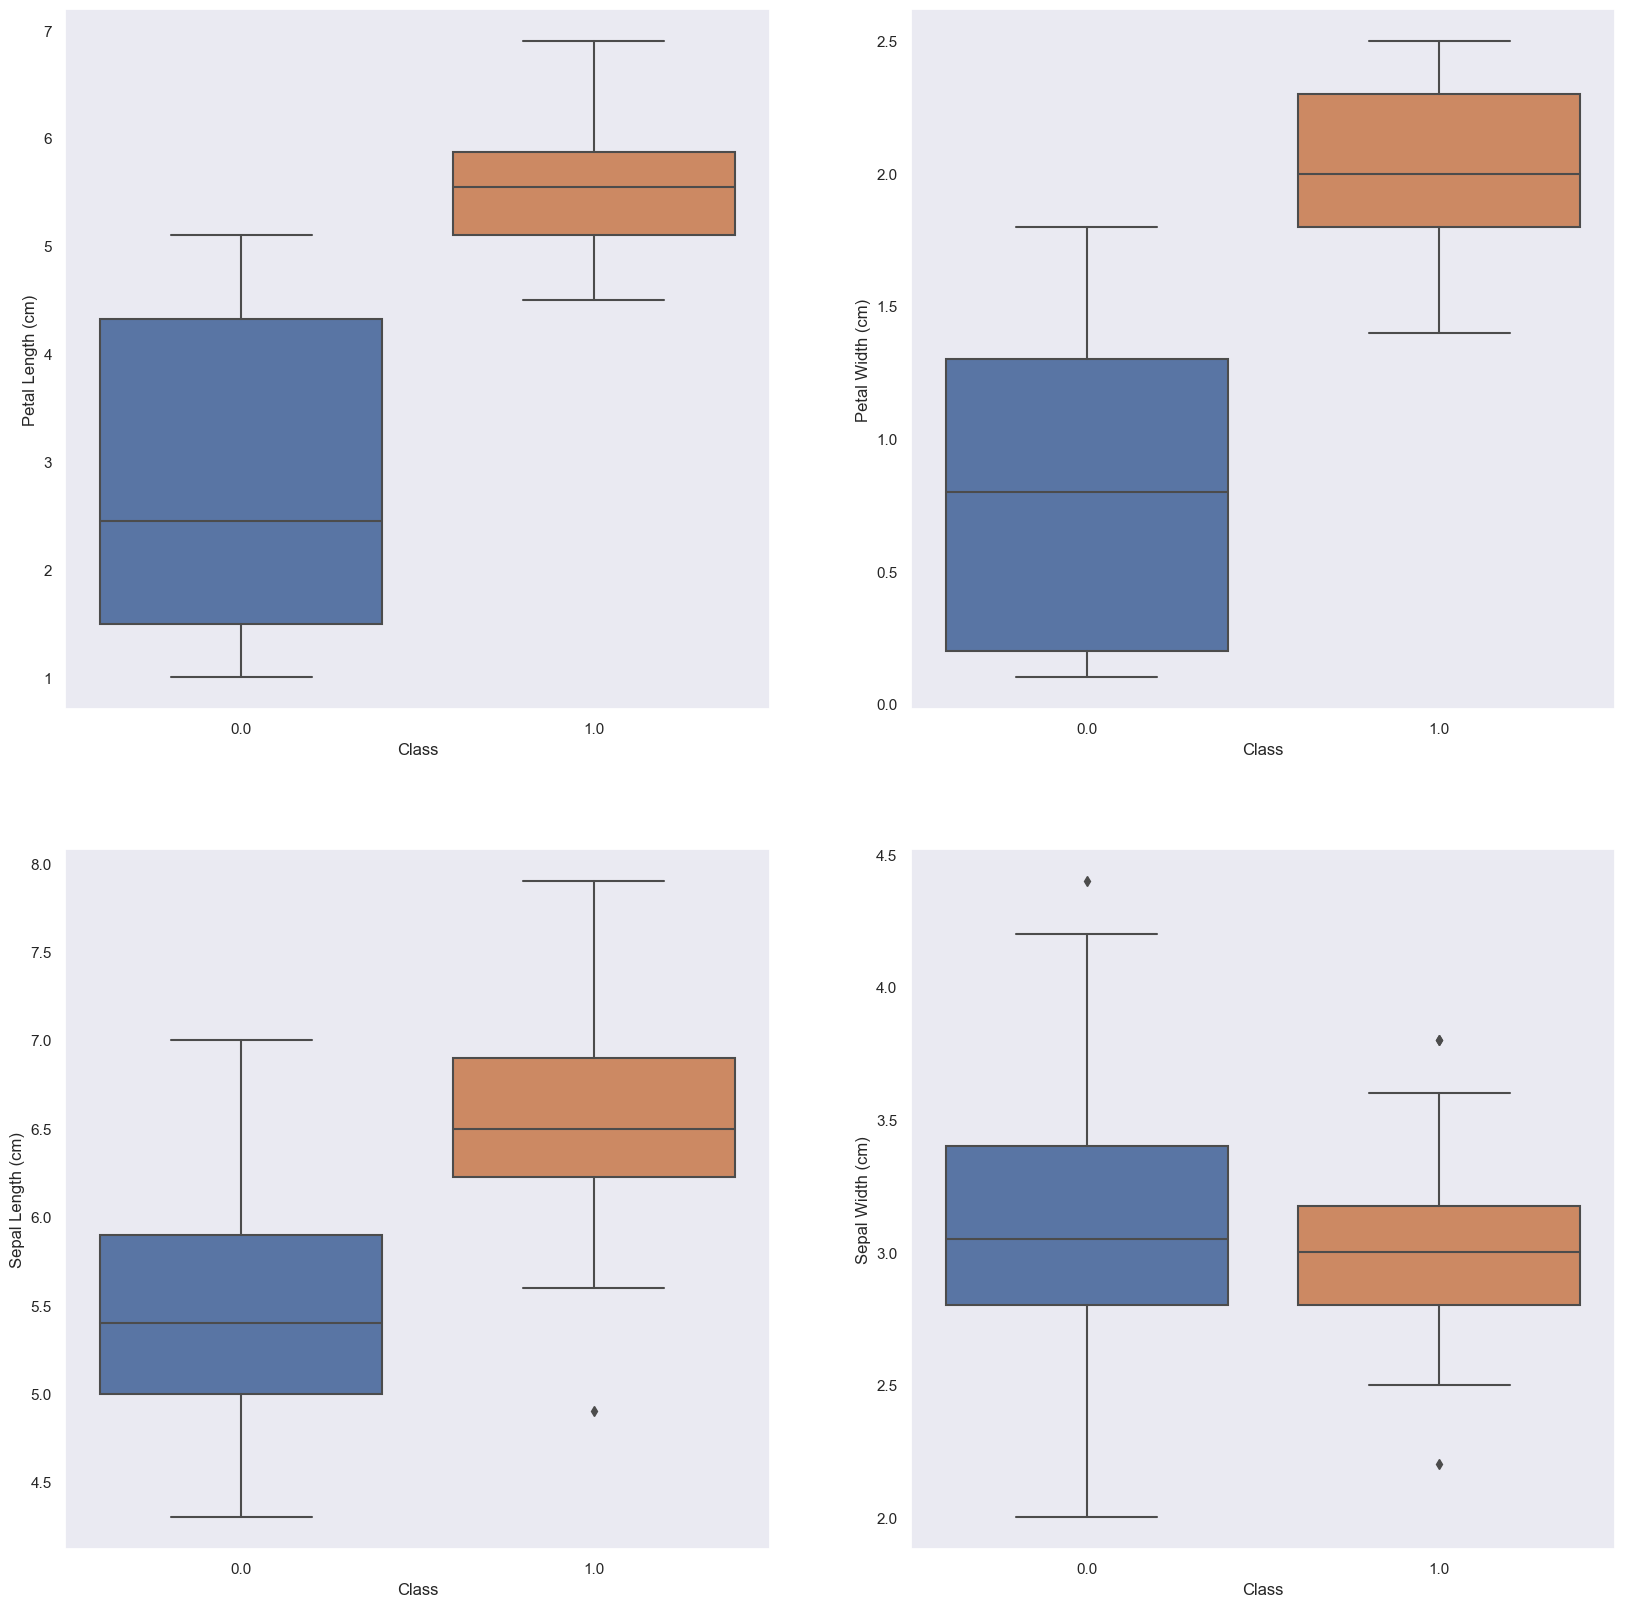

In [22]:

# Assuming you have already loaded iris, X, and y as per your previous code
# Extract the petal length, petal width, sepal length, and sepal width features
X_all = iris.data[["petal length (cm)", "petal width (cm)", "sepal length (cm)", "sepal width (cm)"]].values

# Create a DataFrame with all features and target variable
data_all = pd.DataFrame(data=np.column_stack((X_all, y)), columns=["Petal Length (cm)", "Petal Width (cm)", "Sepal Length (cm)", "Sepal Width (cm)", "Class"])

# Plot boxplots using seaborn for each feature
plt.figure(figsize=(20, 20))
sns.set(style="dark")
plt.subplot(2, 2, 1)
sns.boxplot(x="Class", y="Petal Length (cm)", data=data_all)
plt.subplot(2, 2, 2)
sns.boxplot(x="Class", y="Petal Width (cm)", data=data_all)
plt.subplot(2, 2, 3)
sns.boxplot(x="Class", y="Sepal Length (cm)", data=data_all)
plt.subplot(2, 2, 4)
sns.boxplot(x="Class", y="Sepal Width (cm)", data=data_all)

plt.show()


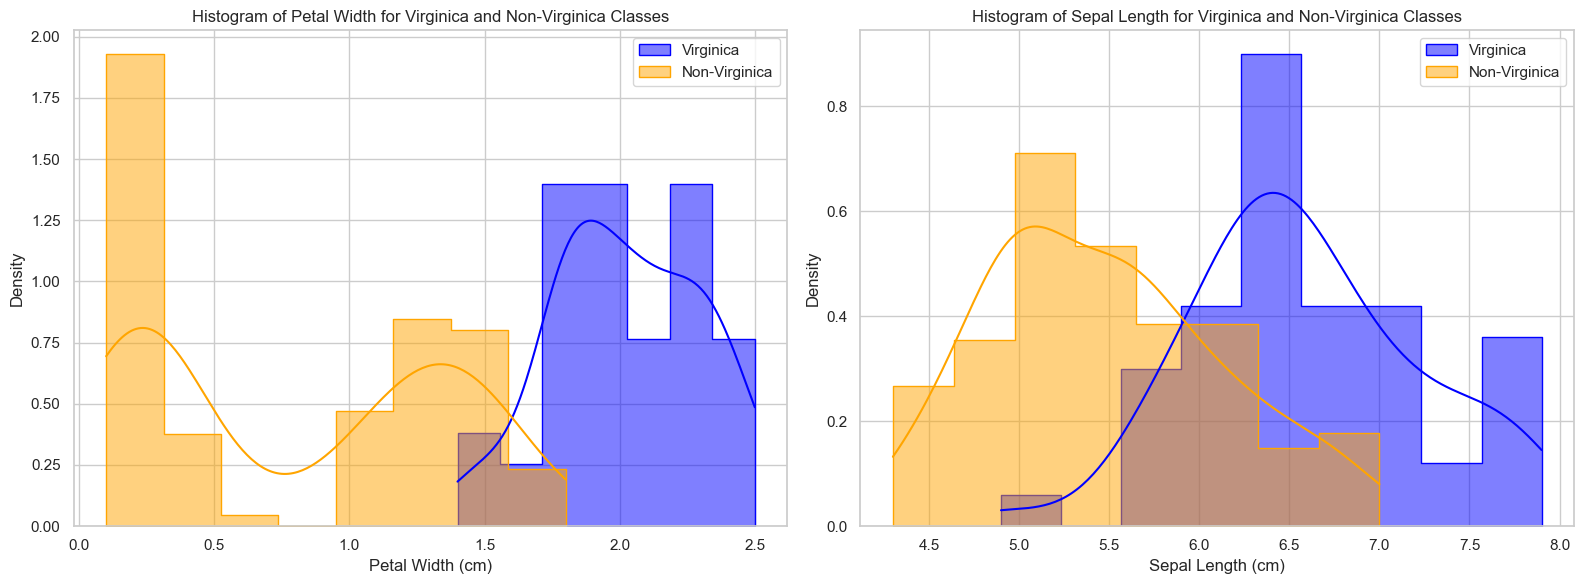

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load the Iris dataset with as_frame=True
iris = load_iris(as_frame=True)

# Extract the petal and sepal features and create the binary target variable
X_pet_sepal = iris.data[["petal width (cm)", "sepal length (cm)"]].values
X_sepal = iris.data[["sepal length (cm)"]].values
y = (iris.target_names[iris.target] == 'virginica').astype(int)

# Create a DataFrame with petal and sepal features, and target variable
data_pet_sepal = pd.DataFrame(data=np.column_stack((X_pet_sepal, y)), columns=["Petal Width (cm)", "Sepal Length (cm)", "Class"])
data_sepal = pd.DataFrame(data=np.column_stack((X_sepal, y)), columns=["Sepal Length (cm)", "Class"])

# Plot histograms using seaborn for petal width
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Petal width histograms
plt.subplot(1, 2, 1)
sns.histplot(data_pet_sepal[data_pet_sepal["Class"] == 1], x="Petal Width (cm)", label="Virginica", color="blue", element="step", stat="density", common_norm=False, kde=True)
sns.histplot(data_pet_sepal[data_pet_sepal["Class"] == 0], x="Petal Width (cm)", label="Non-Virginica", color="orange", element="step", stat="density", common_norm=False, kde=True)
plt.xlabel("Petal Width (cm)")
plt.ylabel("Density")
plt.title("Histogram of Petal Width for Virginica and Non-Virginica Classes")
plt.legend()

# Sepal length histograms
plt.subplot(1, 2, 2)
sns.histplot(data_sepal[data_sepal["Class"] == 1], x="Sepal Length (cm)", label="Virginica", color="blue", element="step", stat="density", common_norm=False, kde=True)
sns.histplot(data_sepal[data_sepal["Class"] == 0], x="Sepal Length (cm)", label="Non-Virginica", color="orange", element="step", stat="density", common_norm=False, kde=True)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Density")
plt.title("Histogram of Sepal Length for Virginica and Non-Virginica Classes")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


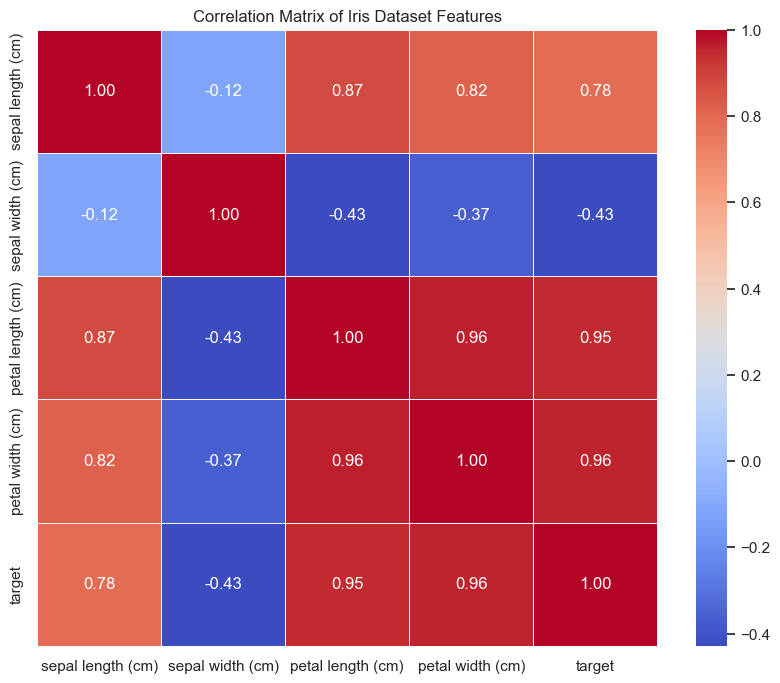

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset with as_frame=True
iris = load_iris(as_frame=True)

# Combine the features and target variable into a single DataFrame
data = pd.concat([iris.data, pd.Series(iris.target, name='target')], axis=1)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()


In [26]:
# Split data into train (80%), validation (10%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the resulting sets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (120, 1)
Validation set shape: (15, 1)
Test set shape: (15, 1)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X and y loaded with the appropriate data

# Features to be used in separate logistic regression models
features = ["petal width (cm)", "petal length (cm)", "sepal width (cm)", "sepal length (cm)"]

for feature in features:
    # Extract the feature
    X_feature = iris.data[[feature]].values

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

    # Create a logistic regression model
    model = LogisticRegression(random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {feature}: {accuracy:.2f}")


Accuracy for petal width (cm): 1.00
Accuracy for petal length (cm): 1.00
Accuracy for sepal width (cm): 0.63
Accuracy for sepal length (cm): 0.93


In [42]:

for feature in features:
  

    # Make predictions on the validation data
    y_pred_val = model.predict(X_val)

    # Calculate and print the accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Accuracy for {feature} on Validation Set: {accuracy_val:.2f}")


Accuracy for petal width (cm) on Validation Set: 0.93
Accuracy for petal length (cm) on Validation Set: 0.93
Accuracy for sepal width (cm) on Validation Set: 0.93
Accuracy for sepal length (cm) on Validation Set: 0.93


In [43]:
for feature in features:
    
    # Make predictions on the validation data
    y_pred_val = model.predict(X_val)
    y_prob_val = model.predict_proba(X_val)[:, 1]

    # Create a DataFrame for the results of this model
    model_results_df = pd.DataFrame({
        "Feature": [feature] * len(X_val),
        "Instance": range(1, len(X_val) + 1),
        "Predicted Class": y_pred_val,
        "Predicted Probability": y_prob_val,
        "Actual Class": y_val
    })

    # Append the results to the overall DataFrame
    results_df = pd.concat([results_df, model_results_df], ignore_index=True)

# Display the results DataFrame
print(results_df)


               Feature Instance Predicted Class  Predicted Probability   
0     petal width (cm)        1               0               0.136714  \
1     petal width (cm)        2               0               0.003761   
2     petal width (cm)        3               1               0.938430   
3     petal width (cm)        4               0               0.354953   
4     petal width (cm)        5               0               0.266489   
..                 ...      ...             ...                    ...   
175  sepal length (cm)       11               1               0.619599   
176  sepal length (cm)       12               0               0.038920   
177  sepal length (cm)       13               0               0.156391   
178  sepal length (cm)       14               0               0.047915   
179  sepal length (cm)       15               0               0.072118   

    Actual Class  
0              0  
1              0  
2              1  
3              0  
4              0

In [45]:
for feature in features:
    
    # Create a DataFrame for the results of this model
    results_df = pd.DataFrame({
        "Instance": range(1, len(X_val) + 1),
        "Probability of Predicting Virginica": y_prob_val,
        "Actual Prediction": y_pred_val,
        "Ground Truth": y_val
    })

    # Display the results DataFrame for each model
    print(f"\nResults for {feature}:\n")
    print(results_df)



Results for petal width (cm):

    Instance  Probability of Predicting Virginica  Actual Prediction   
0          1                             0.405784                  0  \
1          2                             0.222580                  0   
2          3                             0.956713                  1   
3          4                             0.354632                  0   
4          5                             0.757643                  1   
5          6                             0.129809                  0   
6          7                             0.187245                  0   
7          8                             0.795291                  1   
8          9                             0.459066                  0   
9         10                             0.262430                  0   
10        11                             0.619599                  1   
11        12                             0.038920                  0   
12        13                    

In [52]:
for feature in features:
    # Create a DataFrame for the results of this model
    results_df = pd.DataFrame({
        "Instance": range(1, len(X_val) + 1),
        "Probability of Predicting Virginica": y_prob_val,
        "Actual Prediction": y_pred_val,
        "Ground Truth": y_val
    })

    # Display the results DataFrame for each model
    print(f"\nResults for {feature}:\n")
    print(results_df)



Results for sepal width (cm):

    Instance  Probability of Predicting Virginica  Actual Prediction   
0          1                             0.365795                  0  \
1          2                             0.000019                  0   
2          3                             0.999120                  1   
3          4                             0.224457                  0   
4          5                             0.448804                  0   
5          6                             0.000009                  0   
6          7                             0.012831                  0   
7          8                             0.696116                  1   
8          9                             0.224457                  0   
9         10                             0.035276                  0   
10        11                             0.696116                  1   
11        12                             0.000007                  0   
12        13                    

In [50]:
for feature in features:
    # Create a DataFrame for the results of this model
    results_df = pd.DataFrame({
        "Instance": range(1, len(X_val) + 1),
        "Probability of Predicting Virginica": y_prob_val,
        "Actual Prediction": y_pred_val,
        "Ground Truth": y_val
    })

    # Display the results DataFrame for each model
    print(f"\nResults for {feature}:\n")
    print(results_df)



Results for sepal width (cm):

    Instance  Probability of Predicting Virginica  Actual Prediction   
0          1                             0.365795                  0  \
1          2                             0.000019                  0   
2          3                             0.999120                  1   
3          4                             0.224457                  0   
4          5                             0.448804                  0   
5          6                             0.000009                  0   
6          7                             0.012831                  0   
7          8                             0.696116                  1   
8          9                             0.224457                  0   
9         10                             0.035276                  0   
10        11                             0.696116                  1   
11        12                             0.000007                  0   
12        13                    

In [51]:
for feature in features:

    # Create a DataFrame for the results of this model
    results_df = pd.DataFrame({
        "Instance": range(1, len(X_val) + 1),
        "Probability of Predicting Virginica": y_prob_val,
        "Actual Prediction": y_pred_val,
        "Ground Truth": y_val
    })

    # Display the results DataFrame for each model
    print(f"\nResults for {feature}:\n")
    print(results_df)



Results for sepal width (cm):

    Instance  Probability of Predicting Virginica  Actual Prediction   
0          1                             0.365795                  0  \
1          2                             0.000019                  0   
2          3                             0.999120                  1   
3          4                             0.224457                  0   
4          5                             0.448804                  0   
5          6                             0.000009                  0   
6          7                             0.012831                  0   
7          8                             0.696116                  1   
8          9                             0.224457                  0   
9         10                             0.035276                  0   
10        11                             0.696116                  1   
11        12                             0.000007                  0   
12        13                    

### This single measure (Accuracy) gives us a concise understanding of how well each model is performing on the validation set. The consistent accuracy across models suggests a balanced performance across different features

In [59]:
import numpy as np
import plotly.graph_objects as go

def plot_decision_boundary(model, num_features, X_val, y_val):
    if num_features == 1:
        decision_boundary_x = np.linspace(X_val.min(), X_val.max(), 100).reshape(-1, 1)
        decision_boundary_y = model.predict_proba(decision_boundary_x)[:, 1]

        fig = go.Figure()

        # Scatter plot for validation data
        fig.add_trace(go.Scatter(x=X_val.squeeze(), y=y_val, mode='markers', name='Validation Data'))

        # Decision boundary line
        fig.add_trace(go.Scatter(x=decision_boundary_x.squeeze(), y=decision_boundary_y, mode='lines', name='Decision Boundary'))

        fig.update_layout(title=f'Decision Boundary for {num_features} Feature(s)',
                          xaxis_title='Feature',
                          yaxis_title='Probability',
                          showlegend=True)

        fig.show()

    elif num_features == 2 or num_features == 3:
        # Scatter plot for validation data
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=X_val[:, 0], y=X_val[:, 1], mode='markers', name='Validation Data'))

        # Decision boundary surface
        if num_features == 2:
            decision_boundary_x = np.linspace(X_val[:, 0].min(), X_val[:, 0].max(), 100)
            decision_boundary_y = np.linspace(X_val[:, 1].min(), X_val[:, 1].max(), 100)
            x_meshgrid, y_meshgrid = np.meshgrid(decision_boundary_x, decision_boundary_y)
            decision_boundary_input = np.c_[x_meshgrid.ravel(), y_meshgrid.r


SyntaxError: incomplete input (3364978852.py, line 34)

## Conclusion

## Model: Petal Width (cm)
Accuracy on Test Set: 93.33%
This indicates that the chosen model, based on Petal Width, performed well on the test set with an accuracy of 93.33%. The high accuracy suggests that the model generalizes well to new, unseen data.





